In [1]:
# Importing all libraries required
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load and preprocess data
data = pd.read_csv("unclean_pet_data.csv") 

In [3]:
# Handle missing values for target column and numerical columns
data = data.dropna(subset=['AdoptionLikelihood']) 
numerical_cols = ['AgeMonths', 'WeightKg', 'TimeInShelterDays']
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [4]:
# Fill missing values for categorical variables
data['PetType'] = data['PetType'].fillna('Unknown')
data['Breed'] = data['Breed'].fillna('Unknown')
data['Size'] = data['Size'].fillna('Unknown')

In [5]:
# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['PetType', 'Breed', 'Size']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])


In [6]:
# Define features and target
X = data[['PetType', 'Breed', 'Size', 'AgeMonths', 'WeightKg', 'TimeInShelterDays']]
y = data['AdoptionLikelihood']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Optimize KNN with cross-validation
k_range = range(1, 21)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

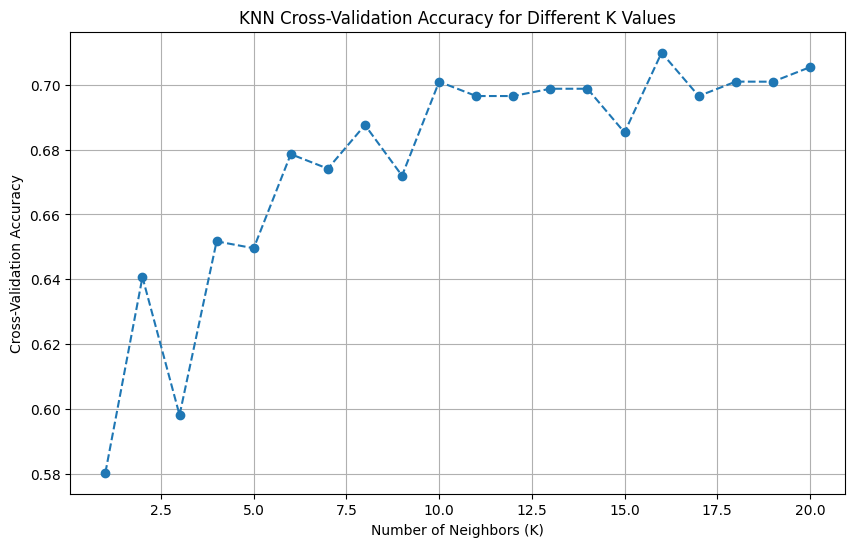

In [9]:
# Plot KNN performance
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid()
plt.show()

Optimal K: 16 with Cross-Validation Accuracy: 0.7099


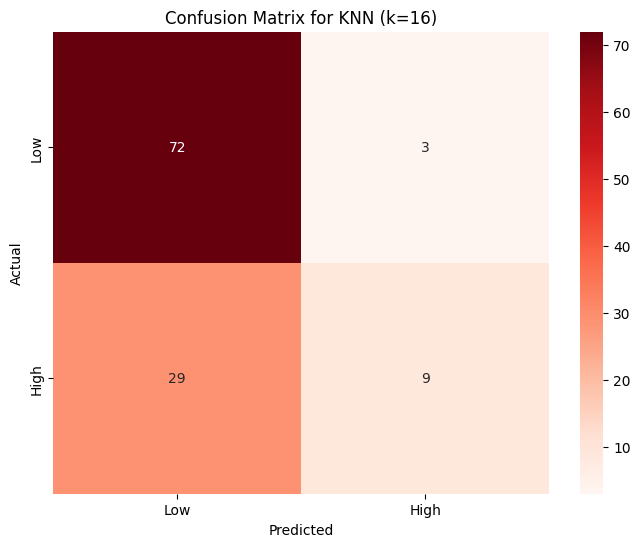

In [10]:
# Print optimal K value
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal K: {optimal_k} with Cross-Validation Accuracy: {max(k_scores):.4f}")

# Visualize confusion matrix for the best K
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title(f'Confusion Matrix for KNN (k={optimal_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_4780\4292882269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['AdoptionLikelihood'] = numerical_data['AdoptionLikelihood'].apply(lambda x: 'High' if x == 1 else 'Low')


<Figure size 1200x1000 with 0 Axes>

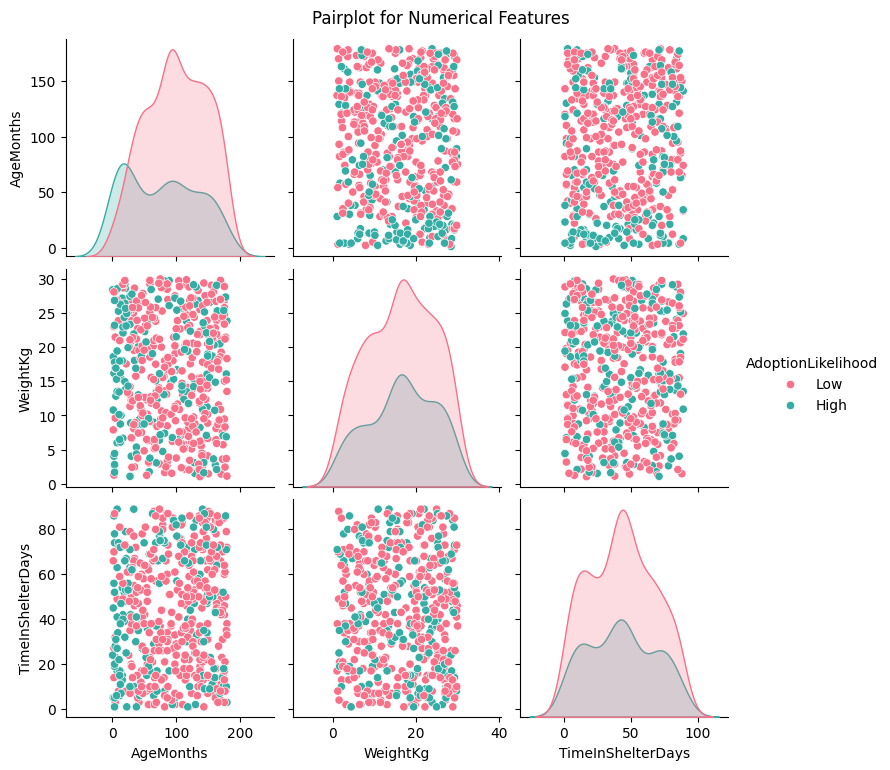

In [11]:
# Pairplot for numerical features
numerical_data = data[['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionLikelihood']]
numerical_data['AdoptionLikelihood'] = numerical_data['AdoptionLikelihood'].apply(lambda x: 'High' if x == 1 else 'Low')
plt.figure(figsize=(12, 10))
sns.pairplot(numerical_data, hue='AdoptionLikelihood', palette='husl')
plt.suptitle('Pairplot for Numerical Features', y=1.02)
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_4780\253434829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


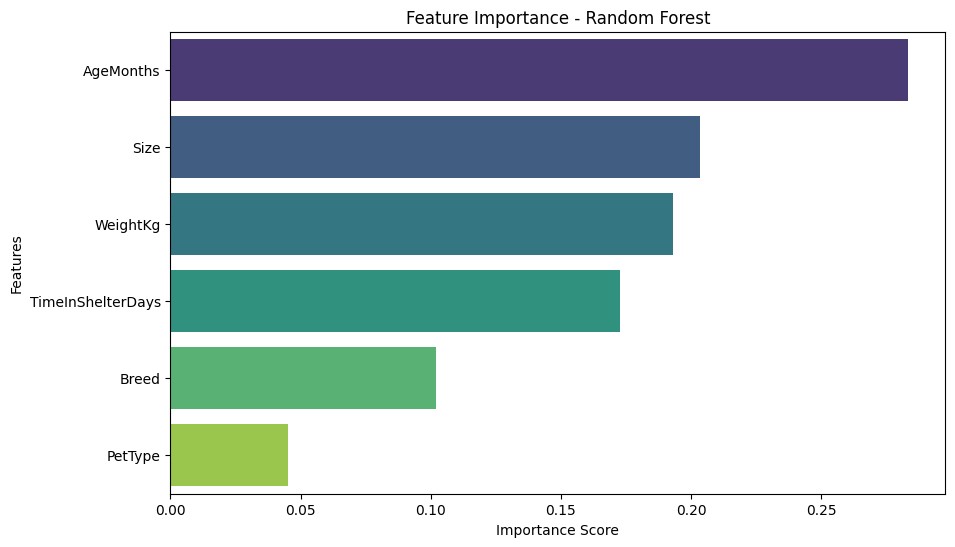

In [14]:
# Visualize feature importance using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

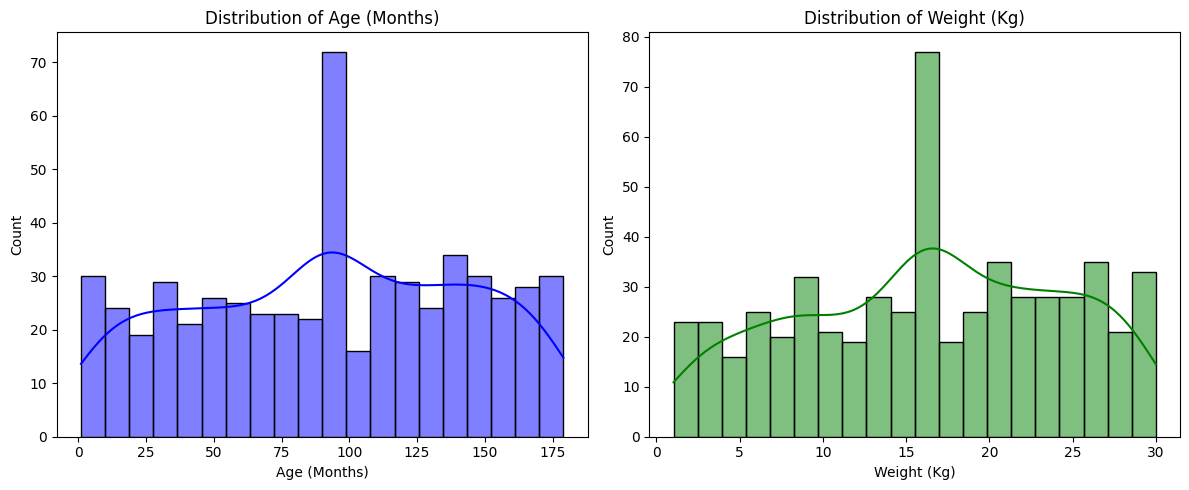

In [15]:
# Distribution plots for Age and Weight
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['AgeMonths'], kde=True, color='blue', bins=20)
plt.title('Distribution of Age (Months)')
plt.xlabel('Age (Months)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data['WeightKg'], kde=True, color='green', bins=20)
plt.title('Distribution of Weight (Kg)')
plt.xlabel('Weight (Kg)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_4780\3266635119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=data, palette='Set2')
C:\Users\prana\AppData\Local\Temp\ipykernel_4780\3266635119.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionLikelihood', y='WeightKg', data=data, palette='Set3')


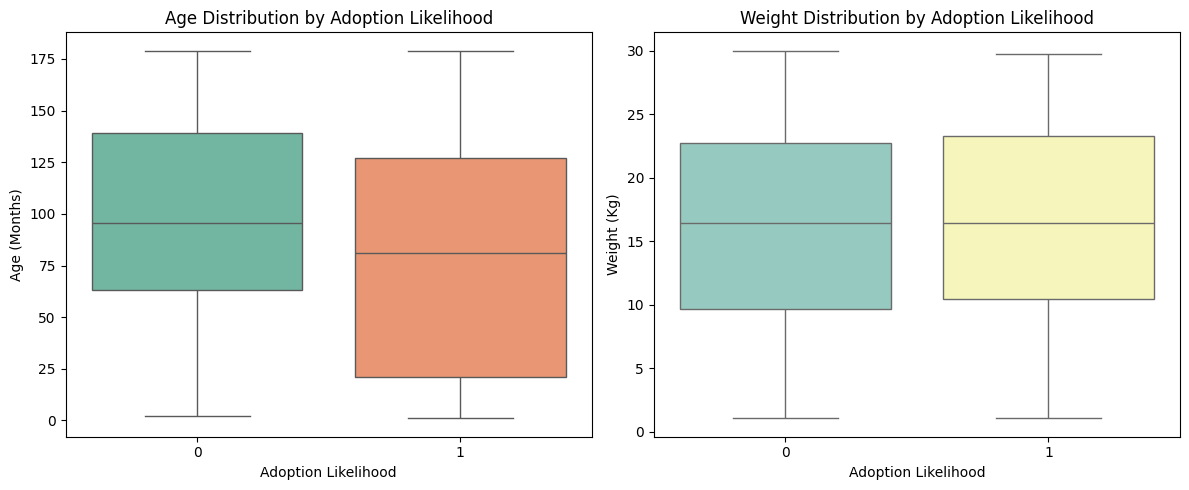

In [16]:
# Boxplots for Age and Weight by Adoption Likelihood
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=data, palette='Set2')
plt.title('Age Distribution by Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Age (Months)')

plt.subplot(1, 2, 2)
sns.boxplot(x='AdoptionLikelihood', y='WeightKg', data=data, palette='Set3')
plt.title('Weight Distribution by Adoption Likelihood')
plt.xlabel('Adoption Likelihood')
plt.ylabel('Weight (Kg)')
plt.tight_layout()
plt.show()

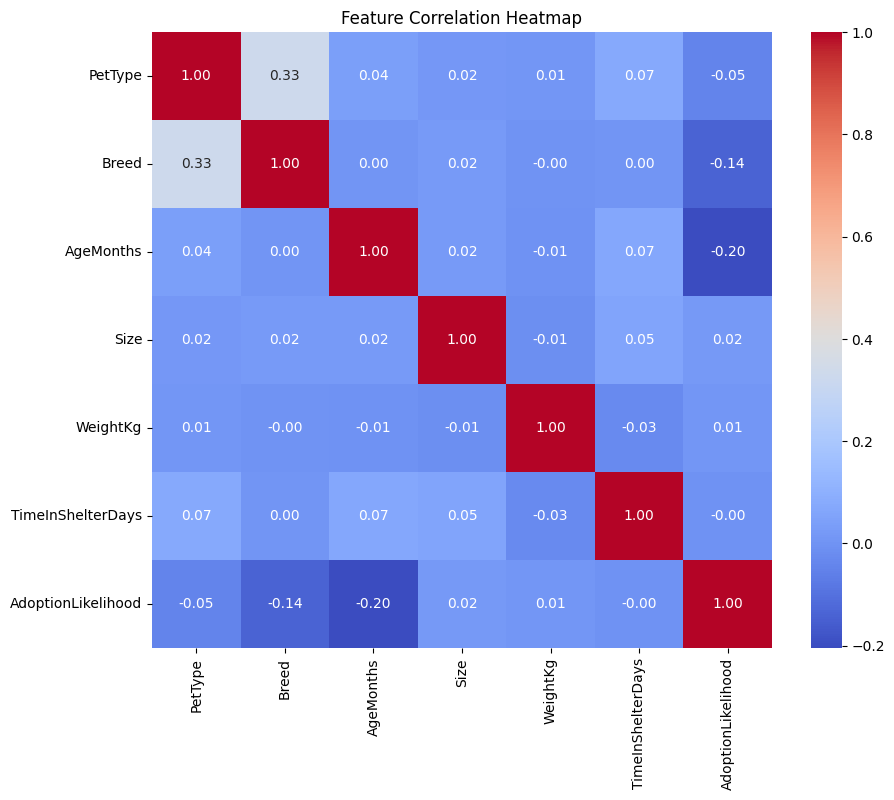

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        75
           1       0.75      0.24      0.36        38

    accuracy                           0.72       113
   macro avg       0.73      0.60      0.59       113
weighted avg       0.73      0.72      0.66       113



In [17]:
# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
